In [57]:
import pandas as pd
from pathlib import Path
import numpy as np
from xlwings import view
# To plot
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline

In [31]:
folders = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

for i in range(len(folders)):
    path = Path('C:/Users/derachic_ai/notebooks/Orders_v3.0/' + folders[i] + '/', 'sales.xlsx')
    df = pd.read_excel(path, header=[0, 1])
    df = df.drop(df.tail(1).index)

    # Сводную таблицу в плоскую
    id_vars = df.columns[0:8].to_list()
    value_vars = df.columns[8:].to_list()
    # Сводную таблицу в плоскую
    df = df.melt(id_vars=id_vars, value_vars=value_vars, value_name='Значение', var_name=['Дата', 'Параметр'])
    if i > 0:
            df = flat_df.append(df, ignore_index=True)
    flat_df = df[df["Значение"] > 0]


c:\Users\derachic_ai\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\derachic_ai\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\derachic_ai\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\derachic_ai\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\derachic_ai\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: 

In [69]:
flat_df = flat_df[flat_df[("Unnamed: 7_level_0", "Название акции")] =='']

In [71]:
flat_df["Дата"] = pd.to_datetime(flat_df["Дата"], format='%d.%m.%y')
flat_df[("Unnamed: 5_level_0", "Код ТМЦ")] = flat_df[("Unnamed: 5_level_0", "Код ТМЦ")].astype(int)
flat_df[("Unnamed: 7_level_0", "Название акции")] = flat_df[("Unnamed: 7_level_0", "Название акции")].fillna("")

<ipython-input-71-ba5684be2ccb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flat_df["Дата"] = pd.to_datetime(flat_df["Дата"], format='%d.%m.%y')
<ipython-input-71-ba5684be2ccb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flat_df[("Unnamed: 5_level_0", "Код ТМЦ")] = flat_df[("Unnamed: 5_level_0", "Код ТМЦ")].astype(int)
<ipython-input-71-ba5684be2ccb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [72]:
index = flat_df.columns[0:9].to_list()
pivot_df = pd.pivot_table(flat_df
               , index=index
               , columns= ["Параметр"]
               , values=["Значение"]
               ,fill_value=0
               ).reset_index().rename_axis(None, axis=0)

pivot_df.head()

Unnamed: 0_level_0   Unnamed: 1_level_0  \
Параметр       Отдел продаж        Подразделение   
0            VIP Главмолоко  VIP Донецк+Область2   
1            VIP Главмолоко  VIP Донецк+Область2   
2            VIP Главмолоко  VIP Донецк+Область2   
3            VIP Главмолоко  VIP Донецк+Область2   
4            VIP Главмолоко  VIP Донецк+Область2   

                      Unnamed: 2_level_0         Unnamed: 3_level_0  \
Параметр                    Должность ТА   Тип товара дистрибьютора   
0         Буденновский,Харцызск,Макеевка  Десерты Молочно-Творожные   
1         Буденновский,Харцызск,Макеевка  Десерты Молочно-Творожные   
2         Буденновский,Харцызск,Макеевка  Десерты Молочно-Творожные   
3         Буденновский,Харцызск,Макеевка  Десерты Молочно-Творожные   
4         Буденновский,Харцызск,Макеевка  Десерты Молочно-Творожные   

               Unnamed: 4_level_0 Unnamed: 5_level_0  \
Параметр Тип товара производителя            Код ТМЦ   
0            Живая Крем сметанный              27128   
1            Живая Крем сметанный              27128   
2            Живая Крем сметанный              27128   
3            Живая Крем сметанный              27128   
4            Живая Крем сметанный              27128   

                Unnamed: 6_level_0 Unnamed: 7_level_0       Дата  \
Параметр Канал сбыта дистрибьютора     Название акции              
0           СУПЕРМАРКЕТ  500 кв.м.                    2023-01-04   
1           СУПЕРМАРКЕТ  500 кв.м.                    2023-01-06   
2           СУПЕРМАРКЕТ  500 кв.м.                    2023-01-26   
3           СУПЕРМАРКЕТ  500 кв.м.                    2023-01-27   
4           СУПЕРМАРКЕТ  500 кв.м.                    2023-01-28   

                Значение                                     \
Параметр % Скидки от БОЦ Количество реализации-возврат в БЕ   
0                 0.0000                                  5   
1                 1.1689                                 14   
2                 0.0000                                 20   
3                 0.0000                                 13   
4                 0.0000                                  9   

                                     
Параметр Недовыполнение заказов, БЕ  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

In [73]:
def feature_engineering(df):
    df["dayofweek"] = df["Дата"].dt.dayofweek
    df["dayofyear"] = df["Дата"].dt.dayofyear
    df["dayofmonth"] = df["Дата"].dt.day
    df["week"] = df["Дата"].dt.isocalendar().week
    df["month"] = df["Дата"].dt.month
    df["year"] = df["Дата"].dt.year

    return df

feature_engineering(pivot_df)

Unnamed: 0_level_0   Unnamed: 1_level_0  \
Параметр       Отдел продаж        Подразделение   
0            VIP Главмолоко  VIP Донецк+Область2   
1            VIP Главмолоко  VIP Донецк+Область2   
2            VIP Главмолоко  VIP Донецк+Область2   
3            VIP Главмолоко  VIP Донецк+Область2   
4            VIP Главмолоко  VIP Донецк+Область2   
...                     ...                  ...   
1030482          Главмолоко              Область   
1030483          Главмолоко              Область   
1030484          Главмолоко              Область   
1030485          Главмолоко              Область   
1030486          Главмолоко              Область   

                      Unnamed: 2_level_0         Unnamed: 3_level_0  \
Параметр                    Должность ТА   Тип товара дистрибьютора   
0         Буденновский,Харцызск,Макеевка  Десерты Молочно-Творожные   
1         Буденновский,Харцызск,Макеевка  Десерты Молочно-Творожные   
2         Буденновский,Харцызск,Макеевка  Десерты Молочно-Творожные   
3         Буденновский,Харцызск,Макеевка  Десерты Молочно-Творожные   
4         Буденновский,Харцызск,Макеевка  Десерты Молочно-Творожные   
...                                  ...                        ...   
1030482                Шахтерск,Шахт.р-н             Творог Сырочки   
1030483                Шахтерск,Шахт.р-н             Творог Сырочки   
1030484                Шахтерск,Шахт.р-н             Творог Сырочки   
1030485                Шахтерск,Шахт.р-н             Творог Сырочки   
1030486                Шахтерск,Шахт.р-н             Творог Сырочки   

               Unnamed: 4_level_0 Unnamed: 5_level_0  \
Параметр Тип товара производителя            Код ТМЦ   
0            Живая Крем сметанный              27128   
1            Живая Крем сметанный              27128   
2            Живая Крем сметанный              27128   
3            Живая Крем сметанный              27128   
4            Живая Крем сметанный              27128   
...                           ...                ...   
1030482        Живая сырок глазир              27179   
1030483        Живая сырок глазир              27179   
1030484        Живая сырок глазир              27179   
1030485        Живая сырок глазир              27179   
1030486        Живая сырок глазир              27179   

                Unnamed: 6_level_0 Unnamed: 7_level_0       Дата  \
Параметр Канал сбыта дистрибьютора     Название акции              
0           СУПЕРМАРКЕТ  500 кв.м.                    2023-01-04   
1           СУПЕРМАРКЕТ  500 кв.м.                    2023-01-06   
2           СУПЕРМАРКЕТ  500 кв.м.                    2023-01-26   
3           СУПЕРМАРКЕТ  500 кв.м.                    2023-01-27   
4           СУПЕРМАРКЕТ  500 кв.м.                    2023-01-28   
...                            ...                ...        ...   
1030482                    РОЗНИЦА                    2023-08-28   
1030483                    РОЗНИЦА                    2023-08-30   
1030484                    РОЗНИЦА                    2023-08-31   
1030485                    РОЗНИЦА                    2023-09-02   
1030486                    РОЗНИЦА                    2023-09-08   

                Значение                                     \
Параметр % Скидки от БОЦ Количество реализации-возврат в БЕ   
0                 0.0000                                  5   
1                 1.1689                                 14   
2                 0.0000                                 20   
3                 0.0000                                 13   
4                 0.0000                                  9   
...                  ...                                ...   
1030482           0.0000                                  8   
1030483           0.0000                                  6   
1030484           0.0000                                  3   
1030485           0.0000                                  5   
1030486           0.0000              

c:\Users\derachic_ai\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


<AxesSubplot:xlabel='month'>

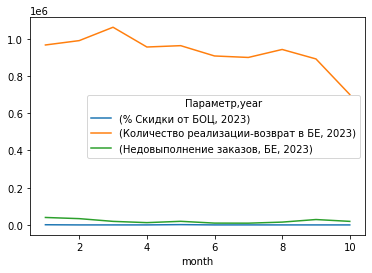

In [74]:
monthly_sales = pd.pivot_table(pivot_df, values = 'Значение', columns = "year", index = "month", aggfunc=np.sum)
monthly_sales.plot()

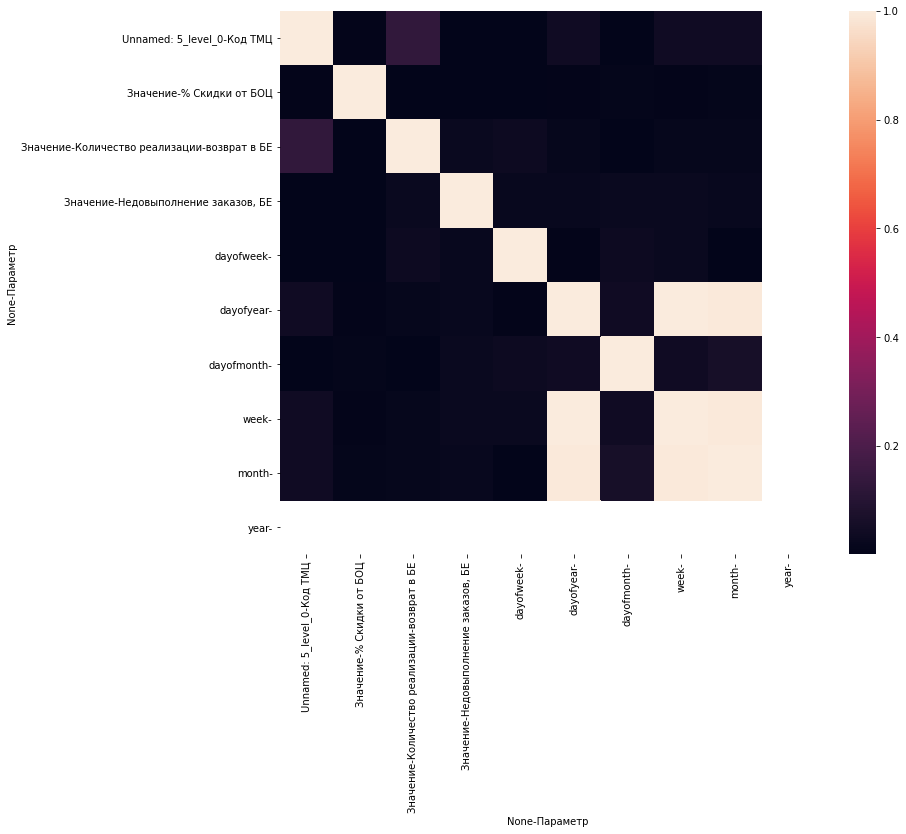

In [75]:
plt.figure(figsize = (12,10))
sns.heatmap(pivot_df.corr().abs())    # To see the correlations
plt.show()

In [76]:
encoded_df = pivot_df
cat_cols = pivot_df.columns[0:5].append(pivot_df.columns[6:7])
 
for col in cat_cols:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(pivot_df[col].values.astype('str')))
    print(lbl.classes_)  # взглянем на категориальные классы
    encoded_df[col] = lbl.transform(list(pivot_df[col].values.astype('str')))

pivot_df

['VIP Главмолоко' 'Беларусская ферма' 'Главмолоко']
['VIP 2' 'VIP Донецк+Область2' 'VIP ОПП' 'Горловка' 'Горловка Енакиево'
 'Донецк 1' 'Донецк 2' 'Донецк1' 'Донецк2' 'Макеевка' 'Макеевка 2'
 'Макеевка Ясиноватая' 'Область']
['5-й кв-л,Калиновка' 'Бессараб,Строит,Комсом,Никитовка'
 'Буденновский р-н' 'Буденновский,Харцызск,Макеевка' 'Будённовский р-н'
 'Ворошиловский р-н' 'Гвард,Ганзовка,Пастуховка'
 'Гвардейка,Восточный,Путь Ильича' 'Горловка,Енакиево,Кировское'
 'Даки,Бажаново' 'Донецк,Мак,Ясинов,Харц,Мариуп' 'Донецк,Макеевка'
 'Донецк,Шахтерск,Торез,Снежное' 'Енак,Ждан,Киров'
 'Енакиево,ЦГР,Ватутина,Карла' 'Енакиево,Юннокоммунаровск'
 'Зеленый,Солнечный,Почта' 'Зеленый,Солнечный,почта'
 'Зугрэс,Илов,Амврос,села' 'Зугрэс,Н.Крынка' 'Иловайск,Амвросиевка и села'
 'Калининский р-н' 'Калининский, Буденновский р-ны'
 'Калининский,Буденновский р-ны' 'Калиновка,405 кв-л' 'Киевский р-н'
 'Киевский, Волноваха, Волн.р-н' 'Кир р-н,Мирный,Текст,Шир,Петр р-н'
 'Кировск,Торез,пос.Кр.Звезда,Ждановк

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
Параметр       Отдел продаж      Подразделение       Должность ТА   
0                         0                  1                  3   
1                         0                  1                  3   
2                         0                  1                  3   
3                         0                  1                  3   
4                         0                  1                  3   
...                     ...                ...                ...   
1030482                   2                 12                 52   
1030483                   2                 12                 52   
1030484                   2                 12                 52   
1030485                   2                 12                 52   
1030486                   2                 12                 52   

               Unnamed: 3_level_0       Unnamed: 4_level_0 Unnamed: 5_level_0  \
Параметр Тип товара дистрибьютора Тип товара производителя            Код ТМЦ   
0                               0                       28              27128   
1                               0                       28              27128   
2                               0                       28              27128   
3                               0                       28              27128   
4                               0                       28              27128   
...                           ...                      ...                ...   
1030482                         8                       38              27179   
1030483                         8                       38              27179   
1030484                         8                       38              27179   
1030485                         8                       38              27179   
1030486                         8                       38              27179   

                Unnamed: 6_level_0 Unnamed: 7_level_0       Дата  \
Параметр Канал сбыта дистрибьютора     Название акции              
0                                9                    2023-01-04   
1                                9                    2023-01-06   
2                                9                    2023-01-26   
3                                9                    2023-01-27   
4                                9                    2023-01-28   
...                            ...                ...        ...   
1030482                          7                    2023-08-28   
1030483                          7                    2023-08-30   
1030484                          7                    2023-08-31   
1030485                          7                    2023-09-02   
1030486                          7                    2023-09-08   

                Значение                                     \
Параметр % Скидки от БОЦ Количество реализации-возврат в БЕ   
0                 0.0000                                  5   
1                 1.1689                                 14   
2                 0.0000                                 20   
3                 0.0000                                 13   
4                 0.0000                                  9   
...                  ...                                ...   
1030482           0.0000                                  8   
1030483           0.0000                                  6   
1030484           0.0000                                  3   
1030485           0.0000                                  5   
1030486           0.0000                                  0   

                                    dayofweek dayofyear dayofmonth week month  \
Параметр Недовыполнение заказов, БЕ                                             
0                                 0         2         4          4    1     1   
1                                 0         4         6          6    1     1   
2                           

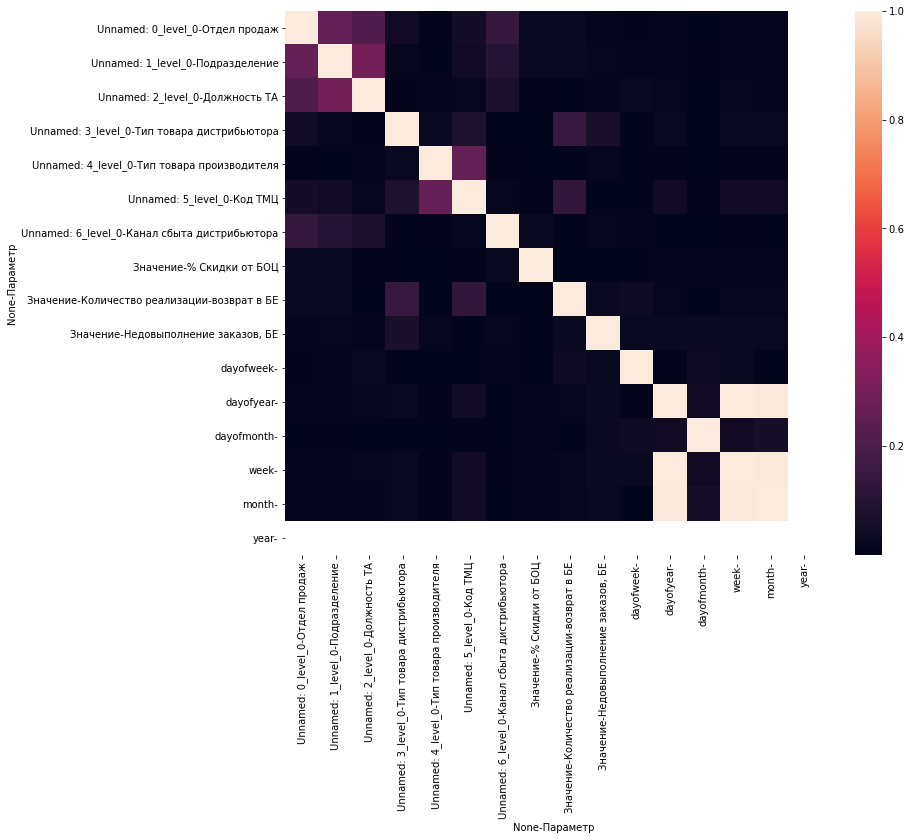

In [77]:
plt.figure(figsize = (12,10))
sns.heatmap(encoded_df.corr().abs())    # To see the correlations
plt.show()

In [78]:
encoded_df


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
Параметр       Отдел продаж      Подразделение       Должность ТА   
0                         0                  1                  3   
1                         0                  1                  3   
2                         0                  1                  3   
3                         0                  1                  3   
4                         0                  1                  3   
...                     ...                ...                ...   
1030482                   2                 12                 52   
1030483                   2                 12                 52   
1030484                   2                 12                 52   
1030485                   2                 12                 52   
1030486                   2                 12                 52   

               Unnamed: 3_level_0       Unnamed: 4_level_0 Unnamed: 5_level_0  \
Параметр Тип товара дистрибьютора Тип товара производителя            Код ТМЦ   
0                               0                       28              27128   
1                               0                       28              27128   
2                               0                       28              27128   
3                               0                       28              27128   
4                               0                       28              27128   
...                           ...                      ...                ...   
1030482                         8                       38              27179   
1030483                         8                       38              27179   
1030484                         8                       38              27179   
1030485                         8                       38              27179   
1030486                         8                       38              27179   

                Unnamed: 6_level_0 Unnamed: 7_level_0       Дата  \
Параметр Канал сбыта дистрибьютора     Название акции              
0                                9                    2023-01-04   
1                                9                    2023-01-06   
2                                9                    2023-01-26   
3                                9                    2023-01-27   
4                                9                    2023-01-28   
...                            ...                ...        ...   
1030482                          7                    2023-08-28   
1030483                          7                    2023-08-30   
1030484                          7                    2023-08-31   
1030485                          7                    2023-09-02   
1030486                          7                    2023-09-08   

                Значение                                     \
Параметр % Скидки от БОЦ Количество реализации-возврат в БЕ   
0                 0.0000                                  5   
1                 1.1689                                 14   
2                 0.0000                                 20   
3                 0.0000                                 13   
4                 0.0000                                  9   
...                  ...                                ...   
1030482           0.0000                                  8   
1030483           0.0000                                  6   
1030484           0.0000                                  3   
1030485           0.0000                                  5   
1030486           0.0000                                  0   

                                    dayofweek dayofyear dayofmonth week month  \
Параметр Недовыполнение заказов, БЕ                                             
0                                 0         2         4          4    1     1   
1                                 0         4         6          6    1     1   
2                           

c:\Users\derachic_ai\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


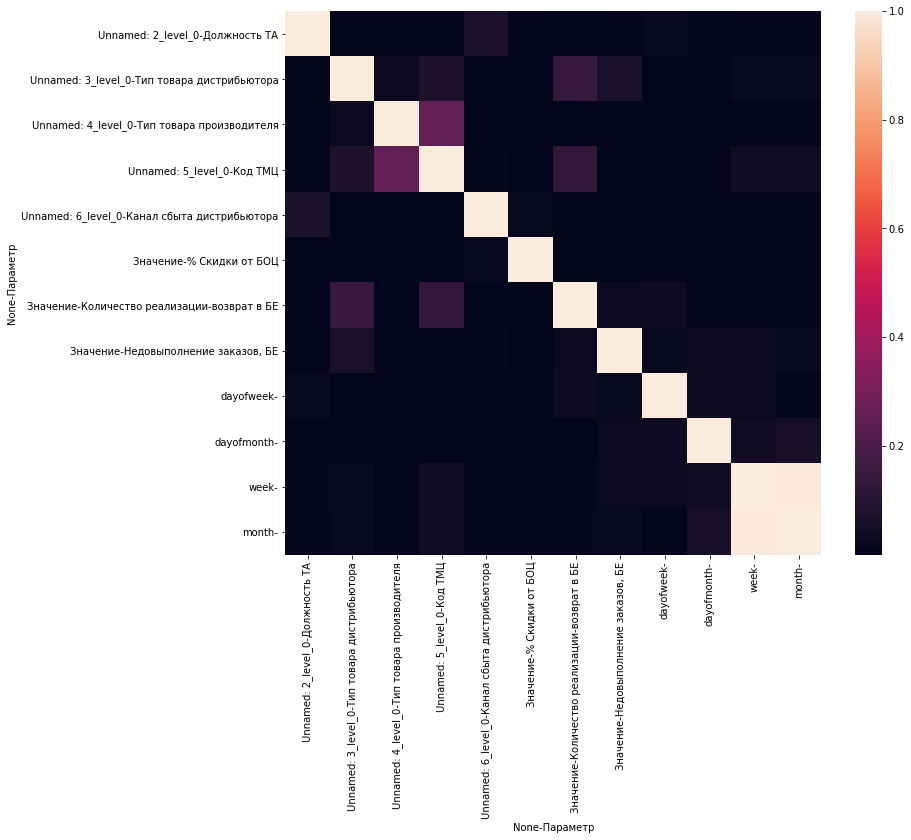

In [79]:
drop_col = [("Unnamed: 0_level_0", "Отдел продаж"), ("Unnamed: 1_level_0", "Подразделение"), ("Unnamed: 7_level_0", "Название акции"), "dayofyear","year"]
encoded_df.drop(drop_col, axis=1, inplace=True)

plt.figure(figsize = (12,10))
sns.heatmap(encoded_df.corr().abs())    # To see the correlations
plt.show()

Creating Train-Test Splits

In [80]:
train_data = encoded_df[:int(0.7*(len(encoded_df)))] # taking train part
test_data = encoded_df[int(0.7*(len(encoded_df))):] # taking test part

target = ("Значение", "Количество реализации-возврат в БЕ")
used_cols = [c for c in encoded_df.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [81]:
X_train = X_train.drop(['Дата'], axis=1) # dropping date from train
X_test = X_test.drop(['Дата'], axis=1) # dropping date from test

c:\Users\derachic_ai\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Metric Definition Function

In [82]:
def wmae_test(test, pred): # WMAE for test 
    error = np.sum(np.abs(test - pred), axis=0)
    return error

Random Forest Regressor

In [83]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

In [84]:
wmae_test(y_test, y_pred_test)

1868240.1648194958